In [1]:
import glob
import os
import albumentations as A
#  import torchsnooper as sn

In [2]:
from helpers import *
from model import *
from train import *
from efficientnet_pytorch import EfficientNet

In [3]:
# Helper module support
from lightningaddon import *

In [4]:
os.environ["TORCH_HOME"] = "/media/hdd/Datasets/"
# DEFINE EVERYTHING
lg = outLogger()

In [5]:
main_path = "/media/hdd/Datasets/shotclassification/trailer/"
batch_size = 512
num_classes = 5
img_size = 128
n_epochs = 5
max_preprocessed = 5000

In [6]:
# Define network
# enet = EfficientNet.from_pretrained(
#             "efficientnet-b3", num_classes=num_classes
#         )
# enet = EfficientNet.from_name("efficientnet-b3")
# in_features = enet._fc.in_features
# enet._fc = nn.Sequential(
#     nn.Linear(in_features, num_classes),
#     nn.Softmax(dim = 1))


In [7]:
enet = xresnet34(c_out= num_classes)
in_features = enet[10].in_features
enet[10] = nn.Sequential(
    nn.Linear(in_features, num_classes),
    nn.Softmax(dim = 1))


In [8]:
# PREPROCESS
lg("start preprocessing")
# preprocess_data(Path("/media/hdd/Datasets/shotclassification/"),max_preprocessed)
lg("end preprocessing")

LOG: start preprocessing
LOG: end preprocessing


In [9]:
# CHOOSE WHERE THE FILES ARE
all_ims = glob.glob(main_path + "/*/*.jpg")
lg(f"Len all : {len(all_ims)}")

LOG: Len all : 9176


In [10]:
# CONVERT TO DATAFRAME FOR STRATIFY
df, label_map = create_from_dict(all_ims, create_label=create_label)
lg("Created dataframe")

                                            image_id label
0  /media/hdd/Datasets/shotclassification/trailer...    LS
1  /media/hdd/Datasets/shotclassification/trailer...    CS
2  /media/hdd/Datasets/shotclassification/trailer...    CS
3  /media/hdd/Datasets/shotclassification/trailer...    LS
4  /media/hdd/Datasets/shotclassification/trailer...    LS
LOG: Created dataframe


In [11]:
# subset
df= df.loc[:1000]

In [12]:
# LOAD
lg("Loading data")
dm = ImDataModule(
    df,
    batch_size=batch_size,
    num_classes=num_classes,
    img_size=img_size,
    data_dir=main_path,
)

class_ids = dm.setup()

LOG: Loading data


In [13]:
# PASS MODEL
model = LitModel(num_classes,model = enet, learning_rate=1e-4)

In [14]:
count_parameters(model.model, show_table=False)

Total Trainable Params: 21334181


21334181

/home/eragon/.local/lib/python3.9/site-packages/torch/onnx/symbolic_helper.py:443: UserWarning: ONNX export mode is set to inference mode, but operator batch_norm is set to inference mode. The model will be exported in inference, as specified by the export mode.
  warnings.warn("ONNX export mode is set to " + training_mode +


run ['dot', '-Kdot', '-Tsvg']


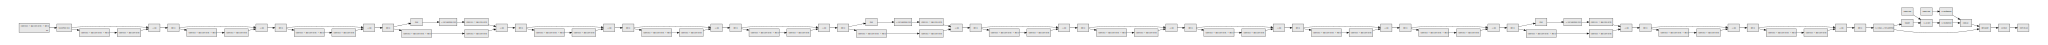

In [15]:
visualize_model(model)

In [16]:
# freeze_to(model.model, 9)

In [17]:
# unfreeze_to(model.model, 9)

In [18]:
total_layer_state(model)

'Frozen: 0, Not: 116, Total: 116'

In [20]:
# RUN TRAINING
logger = CSVLogger("logs", name="xres34-no-aug")
trained = run_training(n_epochs, model, dm, logger=logger)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
Using native 16bit precision.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


KeyboardInterrupt: 

In [ ]:
get_last_log("xres34-no-aug")